In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_time0bk', 'ra', 'dec', 'koi_kepmag']]

In [4]:
X = selected_features
y = df['koi_disposition'].values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 5) (6991, 1)


In [ ]:
## Transform koi_dispositions to numbers 0-1

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = y.copy()

label_encoder.fit(data)
label_encoder.classes_

/Users/rolandonavarro/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [7]:
Y = label_encoder.transform(data)

In [13]:
Y.shape

(6991,)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [16]:
ct = make_column_transformer(
    (MinMaxScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(), make_column_selector(dtype_include=object))
)
ct.fit_transform(X)

array([[5.05695036e-02, 3.10634080e-02, 5.52404609e-01, 7.33837315e-01,
        6.92701876e-01],
       [1.83378329e-02, 4.09275714e-02, 7.84312416e-01, 7.33359990e-01,
        7.00057856e-01],
       [1.37924398e-03, 3.68279703e-02, 2.59712468e-01, 7.42947182e-01,
        7.13364741e-01],
       ...,
       [1.38194896e-03, 9.23468726e-03, 3.04293957e-01, 6.71748665e-01,
        6.43937515e-01],
       [3.93643938e-04, 8.62853628e-03, 6.54425768e-01, 6.72577545e-01,
        6.95842632e-01],
       [4.29162640e-03, 1.14477167e-02, 7.84538809e-01, 6.69070894e-01,
        6.49640466e-01]])

In [17]:
model = make_pipeline(ct, LinearRegression())

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [19]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1a23413dd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1a23413e50>)])),
                ('linearregression', LinearRegression())])

In [20]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [21]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.646989136023901, R2: 0.018484662650874117


/Users/rolandonavarro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


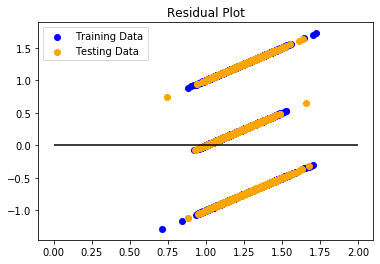

In [22]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
ax.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
ax.legend()
ax.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
ax.set_title("Residual Plot")
fig.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)